In [2]:
#Look at each k-mer in the string, create two k-1mer,
#create an edge for thoes two k-1mer and create a node if it does not exist
def de_bruijn_ize(st, k):
    edges = []
    node = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        node.add(st[i:i+k-1])
        node.add(st[i+1:i+k])
    return node, edges


In [9]:
nodes, edges = de_bruijn_ize('ACGCGTCG', 3)
print(nodes)
print(edges)

{'GT', 'CG', 'TC', 'GC', 'AC'}
[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


In [5]:
#visualize the eulerian walk
def visualize_de_bruijn(st, k):
    #visualize a directed multigraph using graphviz
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s  ;\n' % (src, dst)
    return dot_str + '}\n'


The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


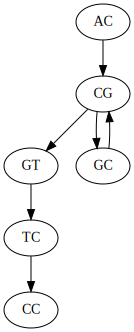

In [6]:
%load_ext gvmagic
%dotstr visualize_de_bruijn('ACGCGTCC', 3)